In [16]:
# Importing necessary libraries for analysis and visualization
import os
# Importing necessary libraries for analysis and visualization
import pandas as pd
# Importing necessary libraries for analysis and visualization
from shapely.geometry import Point
# Importing necessary libraries for analysis and visualization
import geopandas as gpd
# Importing necessary libraries for analysis and visualization
from geopandas import GeoDataFrame
# Importing necessary libraries for analysis and visualization
import folium
# Importing necessary libraries for analysis and visualization
import matplotlib.pyplot as plt
# Importing necessary libraries for analysis and visualization
from pathlib import Path
# Importing necessary libraries for analysis and visualization
from sys import exit
# Importing necessary libraries for analysis and visualization
import numpy as np
# Importing necessary libraries for analysis and visualization
from tqdm import tqdm
# Importing necessary libraries for analysis and visualization
import pickle
# Importing necessary libraries for analysis and visualization
import seaborn as sns
# Importing necessary libraries for analysis and visualization
import folium.plugins as foplug
# Importing necessary libraries for analysis and visualization
from folium.plugins import BeautifyIcon

# Importing necessary libraries for analysis and visualization
import torch
# Importing necessary libraries for analysis and visualization
from kmeans_pytorch import kmeans, kmeans_predict

# Importing necessary libraries for analysis and visualization
import tensorly as tl
# Importing necessary libraries for analysis and visualization
from tensorly import unfold as tl_unfold
# Importing necessary libraries for analysis and visualization
from tensorly.decomposition import parafac
# Importing necessary libraries for analysis and visualization
from sklearn.decomposition import PCA
# Importing necessary libraries for analysis and visualization
from sklearn.cluster import KMeans

# Importing necessary libraries for analysis and visualization
from sklearn.model_selection import train_test_split
# Importing necessary libraries for analysis and visualization
from sklearn.metrics import classification_report
# Importing necessary libraries for analysis and visualization
from sklearn import tree
# Importing necessary libraries for analysis and visualization
from sklearn.ensemble import RandomForestClassifier
# Importing necessary libraries for analysis and visualization
from sklearn.inspection import permutation_importance

# Importing necessary libraries for analysis and visualization
import plotly.express as px
# Importing necessary libraries for analysis and visualization
import plotly.graph_objects as go
# Importing necessary libraries for analysis and visualization
import graphviz
# Importing necessary libraries for analysis and visualization
import shap

# Importing necessary libraries for analysis and visualization
import pydot
# Importing necessary libraries for analysis and visualization
from IPython.display import Image, display

# Creating and visualizing plots
plt.rcParams.update({'font.size': 22})

In [17]:
os.chdir("C:/Users/bhupinderjeet.singh/OneDrive - Washington State University (email.wsu.edu)/WSU/Research Proposal/Paper/Sensitivity_analysis/JournalOfHydrology/Proof_read/Codes")

In [18]:
os.getcwd()

'C:\\Users\\bhupinderjeet.singh\\OneDrive - Washington State University (email.wsu.edu)\\WSU\\Research Proposal\\Paper\\Sensitivity_analysis\\JournalOfHydrology\\Proof_read\\Codes'

In [2]:
# Importing necessary libraries for analysis and visualization
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# Importing necessary libraries for analysis and visualization
from scipy.stats import randint
# Importing necessary libraries for analysis and visualization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [4]:
def removePrefix(text, prefix):
    
    if len(prefix) == 0:
        return text
    
    if text.startswith(prefix):
        text = text[len(prefix):]
    
    return text

def removeSuffix(text, suffix):
    
    if len(suffix) == 0:
        return text
    
    if text.endswith(suffix):
        text = text[:-len(suffix)]
    
    return text

def getCoordinateFromText(name_text, file_prefix, file_suffix):
    try:
        name_text = removePrefix(name_text, file_prefix)
        name_text = removeSuffix(name_text, file_suffix)
        lat, lon = name_text.split('_')
    except:
        print(name_text)
    
    return [float(lat), float(lon)]

def getCoordinatesFromFileNames(file_names, file_prefix, file_suffix):
    
    coord = []
    for file in file_names:
        # print(file)
        try:
            file = removePrefix(file, file_prefix)
            file = removeSuffix(file, file_suffix)
            lat, lon = file.split('_')
            coord.append([float(lon), float(lat)])
        except:
            print(file)
    
    return coord

In [5]:
def correlation_matrix(df: pd.DataFrame):
    """
# Creating and visualizing plots
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
# Creating and visualizing plots
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()
    
    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Subset the matrix
    reduced_matrix = matrix.mask(mask)
    
    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > threshold)]
    
    return to_drop

def get_correlated_factors(df, threshold):
    matrix = df.corr().abs()
    np.fill_diagonal(matrix.values, 0)
    
    corr_factors = {}
    for col in matrix.columns:
        corr_factors[col] = matrix[matrix[col] > threshold][col]
    
    return corr_factors

In [20]:
# Read all the files with target metrics

# Loading data from CSV files
max_swe_df = pd.read_csv(".//data//processed_data//PCA_clustering_input.csv", index_col='file_name')
max_swe_df.head()

PC1       PC2       PC3       PC4       PC5  \
file_name                                                                     
flux_41.34375_-116.03125  10.830441 -6.169162  0.674127  1.012688  0.723389   
flux_41.34375_-116.28125   5.874116  3.783893  1.049862 -5.402627  3.262990   
flux_41.40625_-116.03125   9.206498 -7.972729  0.695939  2.865808 -0.845714   
flux_41.40625_-116.28125  10.274725 -3.565595 -0.319711 -1.212419  0.319970   
flux_41.40625_-116.40625  11.986867 -5.646050  0.429888  1.754554  1.534385   

                               PC6       PC7       PC8       PC9      PC10  \
file_name                                                                    
flux_41.34375_-116.03125 -0.280483 -1.391741  0.831090 -1.987074  0.514740   
flux_41.34375_-116.28125 -3.095625 -0.598605 -0.521802  0.809930 -0.035779   
flux_41.40625_-116.03125 -0.533893 -0.309371 -0.311102  0.619900  0.380291   
flux_41.40625_-116.28125  1.599161 -1.927818 -0.737399 -0.257248  0.771254   
flux_41.40625_-116.40625 -0.601839 -1.036210 -0.160822 -0.866725  0.569328   

                          ...     PC191     PC192     PC193     PC194  \
file_name                 ...                                           
flux_41.34375_-116.03125  ...  0.340655  0.324665  0.597151 -0.148262   
flux_41.34375_-116.28125  ...  0.736655  1.422093  1.567481  1.543142   
flux_41.40625_-116.03125  ...  0.652565 -0.251425 -1.289692 -0.720220   
flux_41.40625_-116.28125  ...  0.542455 -0.784827 -0.263001 -0.057734   
flux_41.40625_-116.40625  ...  1.524116  0.981480 -0.584166  0.786588   

                             PC195     PC196     PC197     PC198     PC199  \
file_name                                                                    
flux_41.34375_-116.03125 -0.431696 -0.144610 -0.928471 -1.055021  0.349764   
flux_41.34375_-116.28125  1.412045  0.849102  1.272875 -0.936492 -0.551662   
flux_41.40625_-116.03125 -0.807442  1.325207 -2.243619 -0.625470  0.574401   
flux_41.40625_-116.28125  0.945571  2.153079 -0.056684  0.681866  0.675614   
flux_41.40625_-116.40625  2.308196  1.092810  0.472056  0.393056 -0.222866   

                             PC200  
file_name                           
flux_41.34375_-116.03125 -0.018805  
flux_41.34375_-116.28125  0.809169  
flux_41.40625_-116.03125  0.122338  
flux_41.40625_-116.28125  0.799117  
flux_41.40625_-116.40625  0.937987  

[5 rows x 200 columns]

In [21]:
x_arr = max_swe_df[:]
x_arr = np.array(x_arr)
x_arr = torch.from_numpy(x_arr)


In [9]:
num_clust_arr = []
tot_var_arr = []

for num_clusters in range(2,10):
    
    device = torch.device("cpu")
    
# Performing k-means clustering
    cluster_ids_x, cluster_centers = kmeans(X=x_arr, num_clusters=num_clusters, distance='euclidean', device=device)
    
    tot_var = 0
# Conducting SHAP analysis for interpretability
    for idx in range(x_arr.shape[0]):
        tot_var = tot_var + torch.sqrt(torch.square(cluster_centers[cluster_ids_x[idx]] - x_arr[idx]).sum())
    num_clust_arr.append(num_clusters)
    tot_var_arr.append(tot_var)

running k-means on cpu..


[running kmeans]: 8it [00:00, 52.28it/s, center_shift=0.000000, iteration=8, tol=0.000100] 


running k-means on cpu..


[running kmeans]: 24it [00:00, 48.28it/s, center_shift=0.000042, iteration=24, tol=0.000100]


running k-means on cpu..


[running kmeans]: 36it [00:00, 38.05it/s, center_shift=0.000000, iteration=36, tol=0.000100]


running k-means on cpu..


[running kmeans]: 51it [00:01, 32.54it/s, center_shift=0.000077, iteration=51, tol=0.000100]


running k-means on cpu..


[running kmeans]: 49it [00:01, 26.38it/s, center_shift=0.000000, iteration=49, tol=0.000100]


running k-means on cpu..


[running kmeans]: 62it [00:02, 22.07it/s, center_shift=0.000000, iteration=62, tol=0.000100]


running k-means on cpu..


[running kmeans]: 33it [00:01, 18.98it/s, center_shift=0.000000, iteration=33, tol=0.000100]


running k-means on cpu..


[running kmeans]: 96it [00:05, 16.50it/s, center_shift=0.000000, iteration=96, tol=0.000100]


Text(0, 0.5, 'Reduction in  Variance')

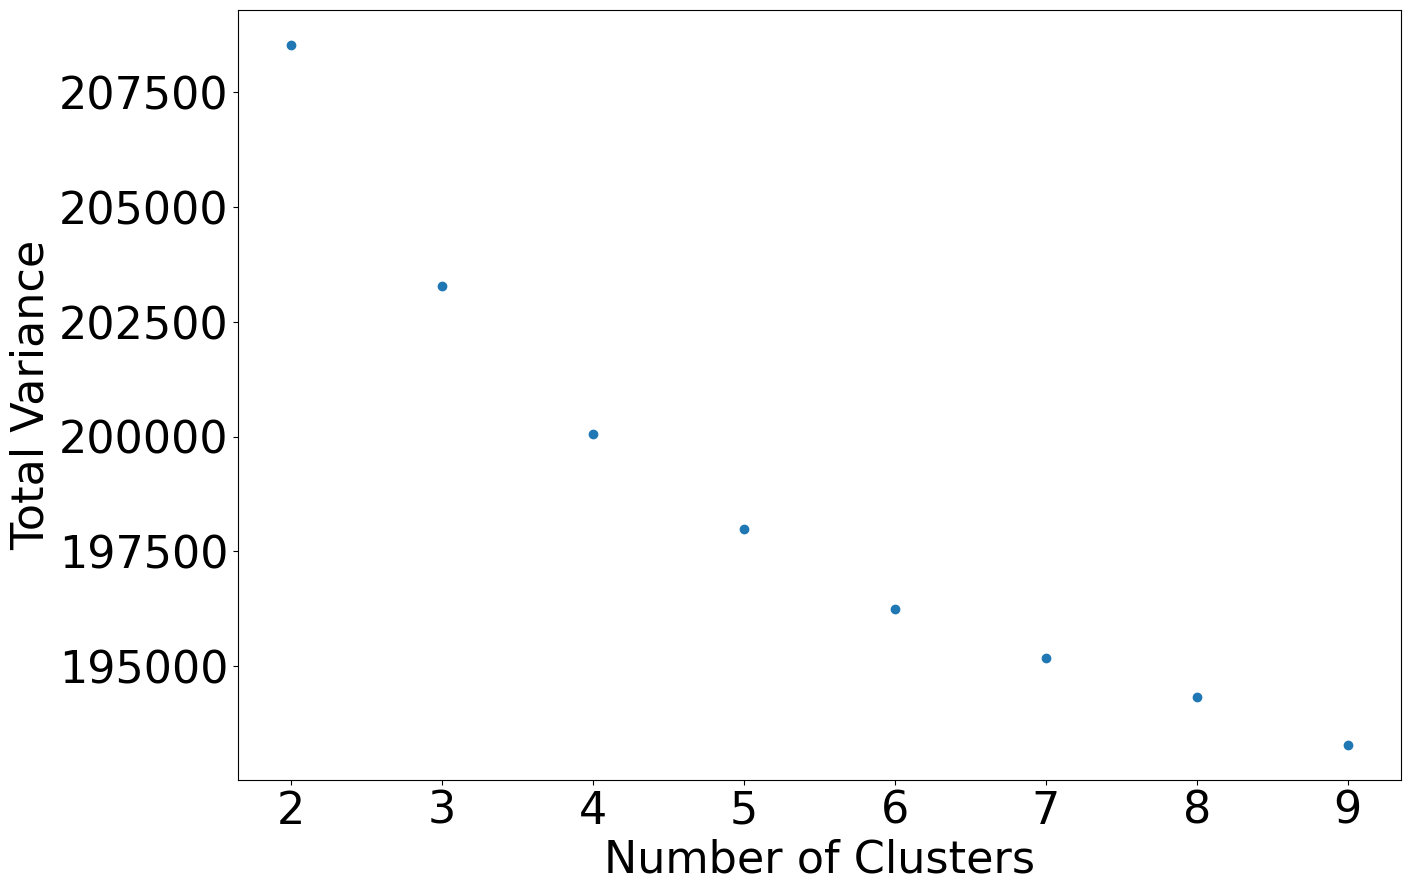

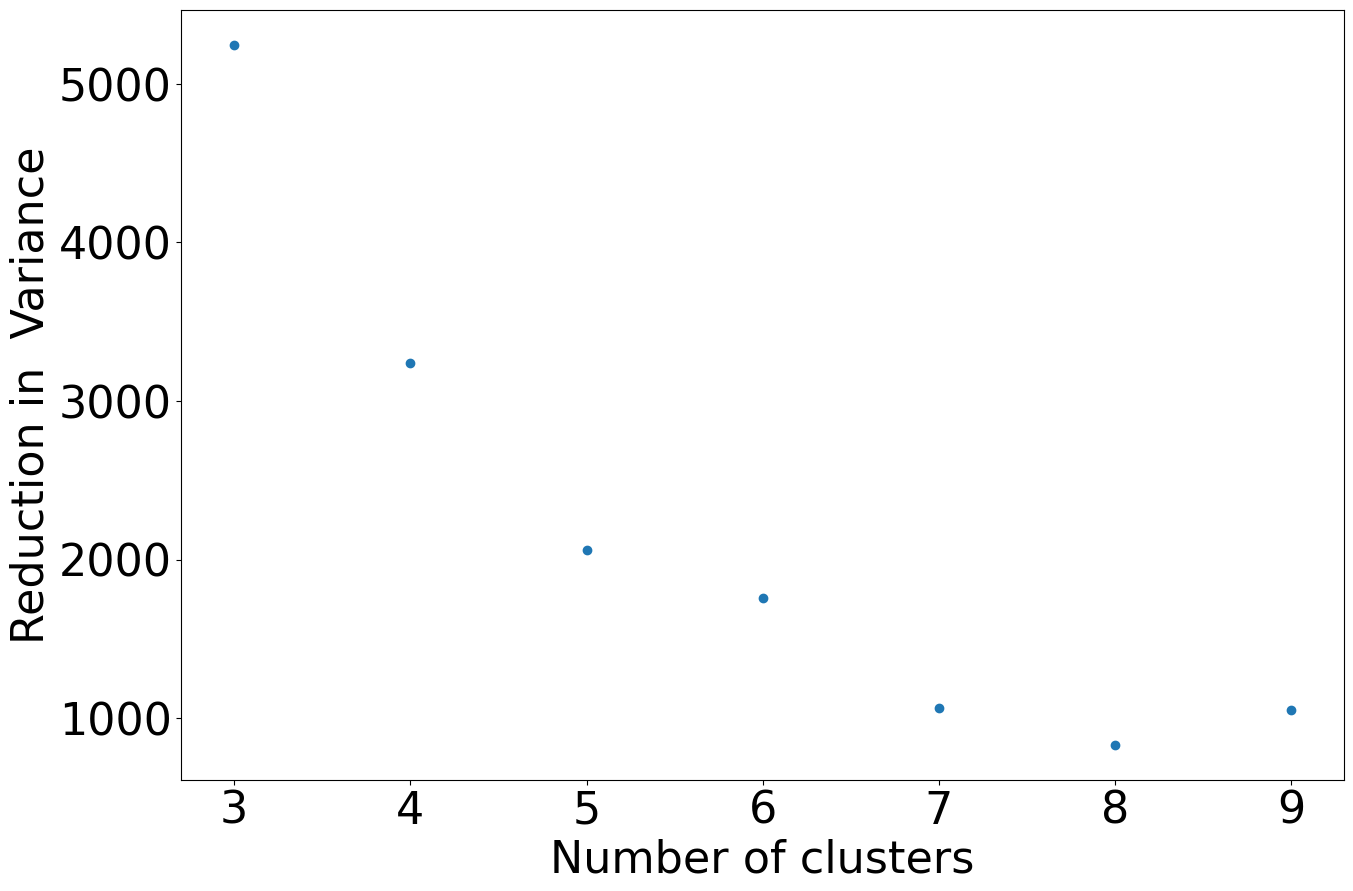

In [10]:
diff_arr = np.array(tot_var_arr)[:-1] - np.array(tot_var_arr)[1:]

# Creating and visualizing plots
plt.rcParams.update({"font.size":32})

# Creating and visualizing plots
fig = plt.figure(num=None,figsize=(15,10))
# Creating and visualizing plots
plt.scatter(num_clust_arr,tot_var_arr)
# Creating and visualizing plots
plt.xlabel("Number of Clusters")
# Creating and visualizing plots
plt.ylabel("Total Variance")

# Creating and visualizing plots
fig = plt.figure(num=None,figsize=(15,10))
# Creating and visualizing plots
plt.scatter(num_clust_arr[1:],diff_arr)
# Creating and visualizing plots
plt.xlabel("Number of clusters")
# Creating and visualizing plots
plt.ylabel("Reduction in  Variance")

In [11]:

#One run only
num_clusters =4

# while checkCondition(cluster_ids_x):
x_arr = max_swe_df[:]
x_arr = np.array(x_arr)
x_arr = torch.from_numpy(x_arr)

device = torch.device('cpu')

# Performing k-means clustering
cluster_ids_x, cluster_centers = kmeans(X=x_arr, num_clusters=num_clusters, distance='euclidean', device=device)

running k-means on cpu..


[running kmeans]: 43it [00:01, 38.59it/s, center_shift=0.000000, iteration=43, tol=0.000100]


In [12]:
map = folium.Map(width=1200, height=600, location = [45.96875, -120.71875], tiles = "Stamen Toner", zoom_start = 7)
# color_arr = ['blue', 'orange', 'green', 'grey', 'purple', 'pink']
#color_arr = ['blue' ,'red', 'green' ,'grey']
#color_arr = ['blue' ,'red', 'green' ,'grey']
color_arr = ["#56B4E9","#009E73","#D55E00","#CC79A7"]
#color_arr = ["#66C2A5","#FC8D62", "#8DA0CB" ,"#E78AC3" ,"#A6D854", "#FFD92F", "#E5C494"]

num_idx = 0
for idx, fq_row in max_swe_df.iterrows():
    lat, lon = getCoordinateFromText(idx, 'flux_', '')
    cluster_id = cluster_ids_x[num_idx].item()
    folium.Circle(radius=2000, fill=True, fillOpacity=0.9, location = [lat, lon], color = color_arr[cluster_id], opacity=0.9).add_to(map)
    
    num_idx = num_idx + 1

display(map)

In [13]:
# Initialize an empty list to store the data
data = []
num_idx = 0
for idx, fq_row in max_swe_df.iterrows():
    lat, lon = getCoordinateFromText(idx, 'flux_', '')
    cluster_id = cluster_ids_x[num_idx].item()
    # Append the values to the data list
    data.append([lat, lon, cluster_id])
    
    num_idx = num_idx + 1

In [14]:
# Create a new DataFrame with the collected data
df_loc_cluster = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Cluster_ID'])

In [15]:
# Creating and visualizing plots
df_loc_cluster.head() ## extracting the latitude and longitude to plot the spatial map in R

Latitude  Longitude  Cluster_ID
0  41.34375 -116.03125           3
1  41.34375 -116.28125           2
2  41.40625 -116.03125           3
3  41.40625 -116.28125           3
4  41.40625 -116.40625           3

In [15]:
# Performing k-means clustering
df_loc_cluster.to_csv(r"E:\Dataset\VIC_sensitivity_analysis\Full_CRB\Clustering\DELSA_kmeans_clusters.csv", index=False)

# Explanatory variables for the supervised RF classifier

In [22]:

soil_file = "./data/processed_data/EDA_features.csv"

# Loading data from CSV files
soil_data_all = pd.read_csv(soil_file, delim_whitespace=True)
soil_data_all.rename(columns={'sum_winter_Precipitation': '%winter_precip'}, inplace=True)

soil_data_all.head()

lat        lng   elevation  b_infilt        Ds  organic0        Ws  \
0  41.34375 -116.28125  2263.56006  0.235058  0.052484   0.01478  0.673148   
1  41.34375 -116.03125  2186.87988  0.235058  0.052484   0.01478  0.673148   
2  41.40625 -116.40625  2035.50000  0.235058  0.052484   0.01478  0.673148   
3  41.40625 -116.28125  1908.06006  0.235058  0.052484   0.01478  0.673148   
4  41.40625 -116.03125  2125.68994  0.235058  0.052484   0.01478  0.673148   

   Wpwp_FRACT0    Dsmax  annual_prec  ...  Csb  Dfb  Dfc  Dsa  Dsb  Dsc  ET  \
0     0.327812  21.9579      466.341  ...    0    0    0    0    0    0   0   
1     0.327812  21.9579      461.644  ...    0    0    0    0    0    0   0   
2     0.327812  21.9579      460.952  ...    0    0    0    0    0    0   0   
3     0.327812  21.9579      458.944  ...    0    0    0    0    0    0   0   
4     0.327812  21.9579      524.232  ...    0    0    0    0    0    0   0   

   %winter_precip     Clay0  init_moist0  
0        0.346800  0.282353     6.041124  
1        0.327642  0.282353     6.041124  
2        0.320352  0.282353     6.041124  
3        0.321873  0.282353     6.041124  
4        0.309809  0.282353     6.041124  

[5 rows x 22 columns]

In [18]:
# Conducting SHAP analysis for interpretability
soil_data_all.shape

(12284, 22)

In [23]:
# Keep only the rows with matching entries in max_swe_df
soil_data_sel = pd.DataFrame()
for idx in max_swe_df.index:
    lat, lon = getCoordinateFromText(idx, 'flux_', '')
    df_row = soil_data_all.loc[(soil_data_all["lat"] == lat) & (soil_data_all["lng"] == lon)]
    soil_data_sel = pd.concat([soil_data_sel, df_row])

soil_data_sel = soil_data_sel.reset_index(drop=True)

In [20]:
# Filter out the row with the specified lat and lng
#soil_data_sel = soil_data_sel[~((soil_data_sel['lat'] == 52.84375) & (soil_data_sel['lng'] == -119.15625))]

In [24]:
#soil_data_sel_wo_loc = soil_data_sel.drop(["lat","lng","file_name","Koppen_climate_code","Koppen_abb","Ksat10","avgJuly_Temp","avg_temp"], axis=1)

soil_data_sel_wo_loc = soil_data_sel.drop(["lat","lng"], axis=1)

soil_data_sel_wo_loc.head()

elevation  b_infilt        Ds  organic0        Ws  Wpwp_FRACT0    Dsmax  \
0  2186.87988  0.235058  0.052484   0.01478  0.673148     0.327812  21.9579   
1  2263.56006  0.235058  0.052484   0.01478  0.673148     0.327812  21.9579   
2  2125.68994  0.235058  0.052484   0.01478  0.673148     0.327812  21.9579   
3  1908.06006  0.235058  0.052484   0.01478  0.673148     0.327812  21.9579   
4  2035.50000  0.235058  0.052484   0.01478  0.673148     0.327812  21.9579   

   annual_prec  BSk  Cfb  Csb  Dfb  Dfc  Dsa  Dsb  Dsc  ET  %winter_precip  \
0      461.644    1    0    0    0    0    0    0    0   0        0.327642   
1      466.341    1    0    0    0    0    0    0    0   0        0.346800   
2      524.232    1    0    0    0    0    0    0    0   0        0.309809   
3      458.944    1    0    0    0    0    0    0    0   0        0.321873   
4      460.952    1    0    0    0    0    0    0    0   0        0.320352   

      Clay0  init_moist0  
0  0.282353     6.041124  
1  0.282353     6.041124  
2  0.282353     6.041124  
3  0.282353     6.041124  
4  0.282353     6.041124

In [25]:
# Importing necessary libraries for analysis and visualization
from sklearn.preprocessing import MinMaxScaler

#columns_to_normalize = ['elevation', 'b_infilt', 'Ds', 'organic0', 'bubble0','bulk_dens_org0',
 #      'Ws', 'Wpwp_FRACT0', 'depth16', 'init_moist8', 'Dsmax','annual_prec']

columns_to_normalize = ['elevation', 'b_infilt', 'Ds', 'organic0','Ws', 'Wpwp_FRACT0','Dsmax','annual_prec', 'init_moist0', 'Clay0', '%winter_precip']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
# Fitting the model with training data
soil_data_sel_wo_loc[columns_to_normalize] = scaler.fit_transform(soil_data_sel_wo_loc[columns_to_normalize])


In [26]:
soil_data_sel_wo_loc.head()

elevation  b_infilt        Ds  organic0       Ws  Wpwp_FRACT0     Dsmax  \
0   0.639159  0.776674  0.049888  0.036407  0.65511     0.009858  0.735645   
1   0.662894  0.776674  0.049888  0.036407  0.65511     0.009858  0.735645   
2   0.620218  0.776674  0.049888  0.036407  0.65511     0.009858  0.735645   
3   0.552854  0.776674  0.049888  0.036407  0.65511     0.009858  0.735645   
4   0.592301  0.776674  0.049888  0.036407  0.65511     0.009858  0.735645   

   annual_prec  BSk  Cfb  Csb  Dfb  Dfc  Dsa  Dsb  Dsc  ET  %winter_precip  \
0     0.048757    1    0    0    0    0    0    0    0   0        0.448239   
1     0.049639    1    0    0    0    0    0    0    0   0        0.496043   
2     0.060520    1    0    0    0    0    0    0    0   0        0.403740   
3     0.048249    1    0    0    0    0    0    0    0   0        0.433842   
4     0.048627    1    0    0    0    0    0    0    0   0        0.430048   

      Clay0  init_moist0  
0  0.509912     0.085587  
1  0.509912     0.085587  
2  0.509912     0.085587  
3  0.509912     0.085587  
4  0.509912     0.085587

In [27]:
soil_data_sel_wo_loc.columns

Index(['elevation', 'b_infilt', 'Ds', 'organic0', 'Ws', 'Wpwp_FRACT0', 'Dsmax',
       'annual_prec', 'BSk', 'Cfb', 'Csb', 'Dfb', 'Dfc', 'Dsa', 'Dsb', 'Dsc',
       'ET', '%winter_precip', 'Clay0', 'init_moist0'],
      dtype='object')

#  XGBoost classifier

In [29]:
# Importing necessary libraries for analysis and visualization
from sklearn.model_selection import train_test_split
# Importing necessary libraries for analysis and visualization
from xgboost import XGBClassifier
# Importing necessary libraries for analysis and visualization
from sklearn.metrics import classification_report, confusion_matrix

# Fitting the model with training data
def xgboost_fitting(X, y, max_depth, learning_rate, n_estimators, min_child_weight):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Fit the model
    model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
                          min_child_weight=min_child_weight, random_state=0)
    
# Fitting the model with training data
    clf = model.fit(X_train, y_train)
    
    # Predict class labels on training data
# Making predictions using the model
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on test data
# Making predictions using the model
    pred_labels_te = model.predict(X_test)
    
    # Tree summary and model evaluation metrics
    print('*************** Model Summary ***************')
    print('Classes: ', clf.classes_)
    print('No. of outputs: ', clf.n_classes_)
    print('No. of features: ', clf.n_features_in_)
    print('No. of estimators: ', clf.n_estimators)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    # Confusion matrix for test data
    conf_matrix_te = confusion_matrix(y_test, pred_labels_te)
    print('Confusion Matrix (Test Data):\n', conf_matrix_te)
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Confusion matrix for training data
    conf_matrix_tr = confusion_matrix(y_train, pred_labels_tr)
    print('Confusion Matrix (Training Data):\n', conf_matrix_tr)
    
# Creating and visualizing plots
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, conf_matrix_te, conf_matrix_tr

In [30]:
X = soil_data_sel_wo_loc
y = np.array(cluster_ids_x)
# Example usage:
# Replace the parameters with your desired values
#learning rate = 0.05 to 0.3 (0.1 works)

# Fitting the model with training data
X_train, X_test, y_train, y_test, clf, conf_matrix_te, conf_matrix_tr = xgboost_fitting(
    X, y, max_depth=7, learning_rate=0.1, n_estimators=140, min_child_weight=10
)

*************** Model Summary ***************
Classes:  [0 1 2 3]
No. of outputs:  4
No. of features:  20
No. of estimators:  140
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7855107855107855
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       461
           1       0.79      0.84      0.81       964
           2       0.74      0.78      0.76       744
           3       0.78      0.68      0.72       288

    accuracy                           0.79      2457
   macro avg       0.80      0.76      0.78      2457
weighted avg       0.79      0.79      0.79      2457

--------------------------------------------------------

Confusion Matrix (Test Data):
 [[350 108   3   0]
 [ 46 805 110   3]
 [  2 110 580  52]
 [  0   2  91 195]]
*************** Evaluation on Training Data ***************
Accuracy Score:  0.8746311183474101
              precision

# SHAP Analysis

In [31]:
# compute SHAP values
# Conducting SHAP analysis for interpretability
explainer = shap.TreeExplainer(clf)
# Conducting SHAP analysis for interpretability
shap_values = explainer.shap_values(X)



[15:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


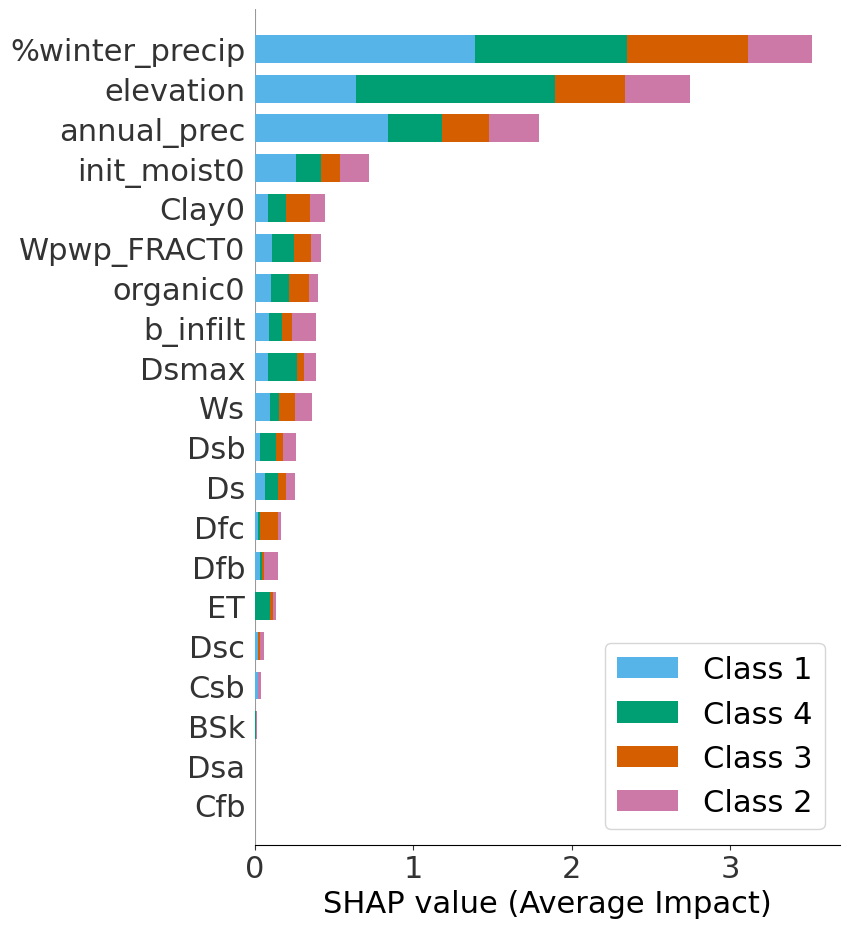

In [32]:
# Creating and visualizing plots
# shap.summary_plot function has an issue that it messes up the order of colors. For each run of the 
# k-means clustering algorithm (where cluster id's are assigned randomly to a set of gridcells), the color array
# of the getColor function needs to be modified (order of colors), so that class id matches with the original
# assigned color id in the proper order: ['blue', 'red', 'green', 'grey', 'purple', 'pink']. For example,
# Class 1 needs to be blue, Class 2 red, and so on ..

def getColor(i):
    #color = ["#FC8D62","#E78AC3" ,"#66C2A5" , "#8DA0CB","#A6D854", "#FFD92F"] 
    #color = ['blue', 'green','red', 'grey']
    color = ["#56B4E9","#009E73","#D55E00","#CC79A7"]
    return color[i]

# Creating and visualizing plots
shap.summary_plot(shap_values, X.values, plot_type="bar", color=getColor, class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4','Class 5','Class 6'], feature_names = X.columns, show=False)
# Creating and visualizing plots
fig, ax = plt.gcf(), plt.gca()

# Creating and visualizing plots
# Modifying main plot parameters
ax.tick_params(labelsize=22)
ax.set_xlabel("SHAP value (Average Impact)", fontsize=22)
ax.legend(fontsize=22, loc='lower right', bbox_to_anchor=(1, 0))



# Creating and visualizing plots
plt.savefig('E:/Dataset/VIC_sensitivity_analysis/Full_CRB/Figures/Clustering/Avg_shap_values.png', bbox_inches='tight')
# Creating and visualizing plots
plt.show()

# Creating and visualizing plots
# shap.summary_plot(shap_values, X.values, plot_type="bar", color=getColor, feature_names = X.columns)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


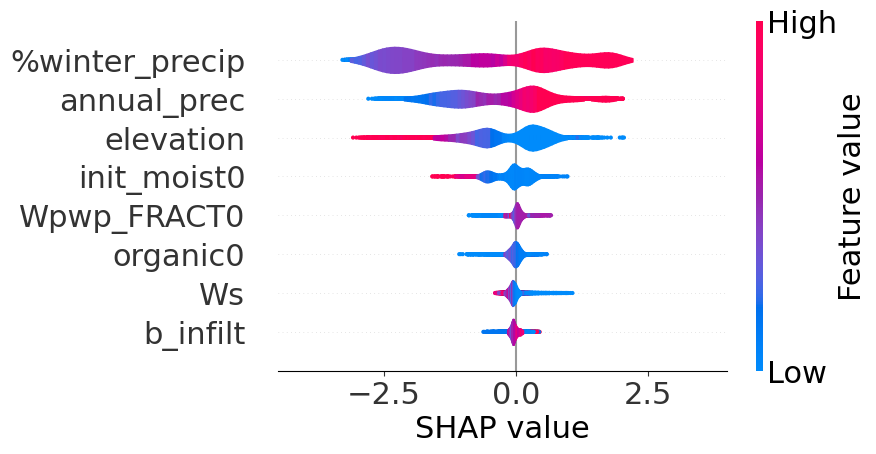

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


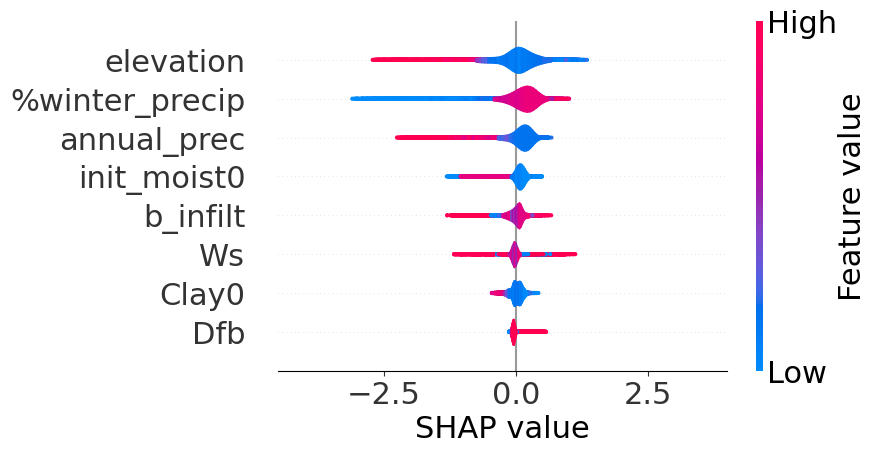

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


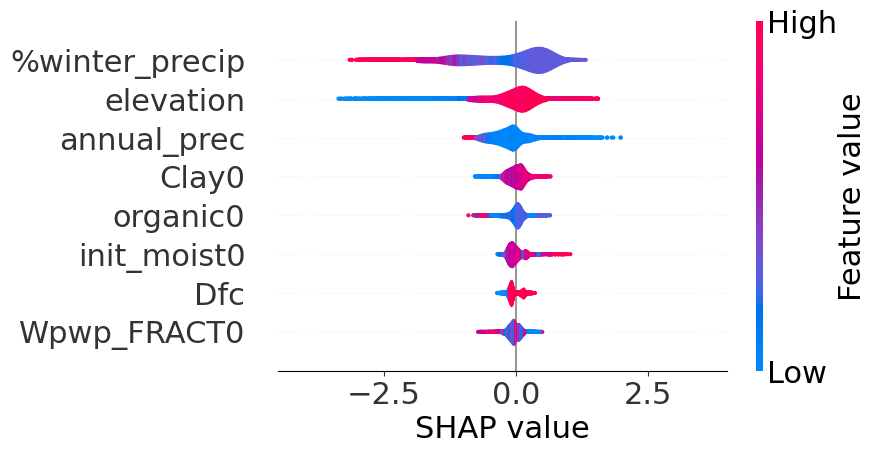

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


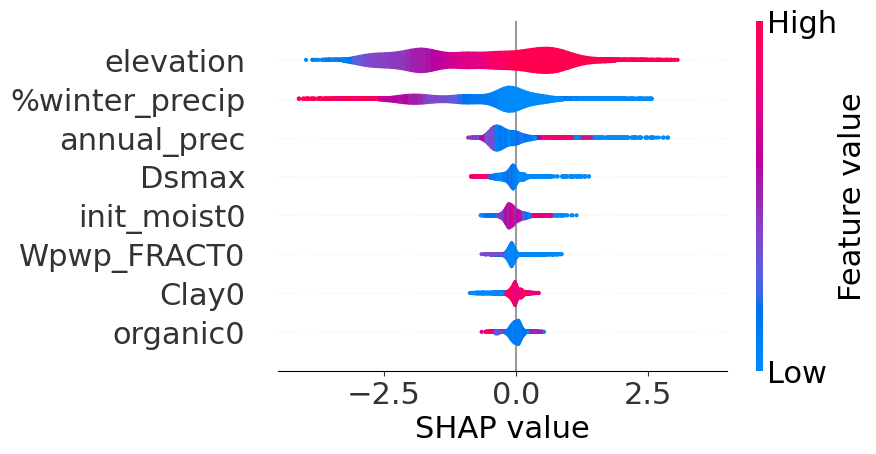

In [33]:
# Creating and visualizing plots
# shap.dependence_plot('infilt', shap_values[0], X, display_features=X_display)
# Creating and visualizing plots
# plt.rcParams.update({'font.size': 22})

# Creating and visualizing plots
def shap_indiv_plot(shap_values, cluster_id):
# Creating and visualizing plots
    shap.summary_plot(shap_values[cluster_id], X, max_display=8, feature_names = X.columns, show=False,plot_type='violin')
# Creating and visualizing plots
    fig, ax = plt.gcf(), plt.gca()

    fig.axes[-1].set_aspect('auto')
# Creating and visualizing plots
    plt.tight_layout()
    fig.axes[-1].set_box_aspect(50)

    ax.tick_params(labelsize=22)
    ax.set_xlabel("SHAP value", fontsize=22)

    cb_ax = fig.axes[1]
    cb_ax.tick_params(labelsize=22)
    cb_ax.set_ylabel("Feature value", fontsize=22)
    ax.set_xlim(-4.5, 4)
# Creating and visualizing plots
    plt.savefig('E:/Dataset/VIC_sensitivity_analysis/Full_CRB/Figures/Clustering/RF_vs_XGBoost/XGBoost/cb_'+str(cluster_id+1)+'_shap_final_V2.png', bbox_inches='tight')
# Creating and visualizing plots
    plt.show()


# Creating and visualizing plots
shap_indiv_plot(shap_values, 0)
# Creating and visualizing plots
shap_indiv_plot(shap_values, 1)
# Creating and visualizing plots
shap_indiv_plot(shap_values, 2)
# Creating and visualizing plots
shap_indiv_plot(shap_values, 3)